# Salary prediction using machine learning methods

### train model,handle missing data,salary is target.
### predict for
* 2 year experience, 9 test score, 6 interview score
* 12 year experience, 10 test score, 10 interview score

store result as a text file.

### Data definition -> labeel
* experience -> exp
* test_score(out of 10) -> tscor
* interview_score(out of 10) -> iscor
* salary($) -> sal



### Importing Needed packages
 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
df=pd.read_csv('./salary.csv')

print(df.to_string())

    exp  tscore  iscore    sal
0   NaN     8.0       9  50000
1   NaN     8.0       6  45000
2   5.0     6.0       7  60000
3   2.0    10.0      10  65000
4   7.0     9.0       6  70000
5   3.0     7.0      10  62000
6  10.0     NaN       7  72000
7  11.0     7.0       8  80000


### handle missing valus  

In [24]:
df=df.dropna()
print(df.to_string())

    exp  tscore  iscore    sal
2   5.0     6.0       7  60000
3   2.0    10.0      10  65000
4   7.0     9.0       6  70000
5   3.0     7.0      10  62000
7  11.0     7.0       8  80000


In [25]:
df.describe()

,exp,tscore,iscore,sal
count,5.000000,5.000000,5.000000,5.000000
mean,5.600000,7.800000,8.200000,67400.000000
std,3.577709,1.643168,1.788854,7987.490219
min,2.000000,6.000000,6.000000,60000.000000
25%,3.000000,7.000000,7.000000,62000.000000
50%,5.000000,7.000000,8.000000,65000.000000
75%,7.000000,9.000000,10.000000,70000.000000
max,11.000000,10.000000,10.000000,80000.000000


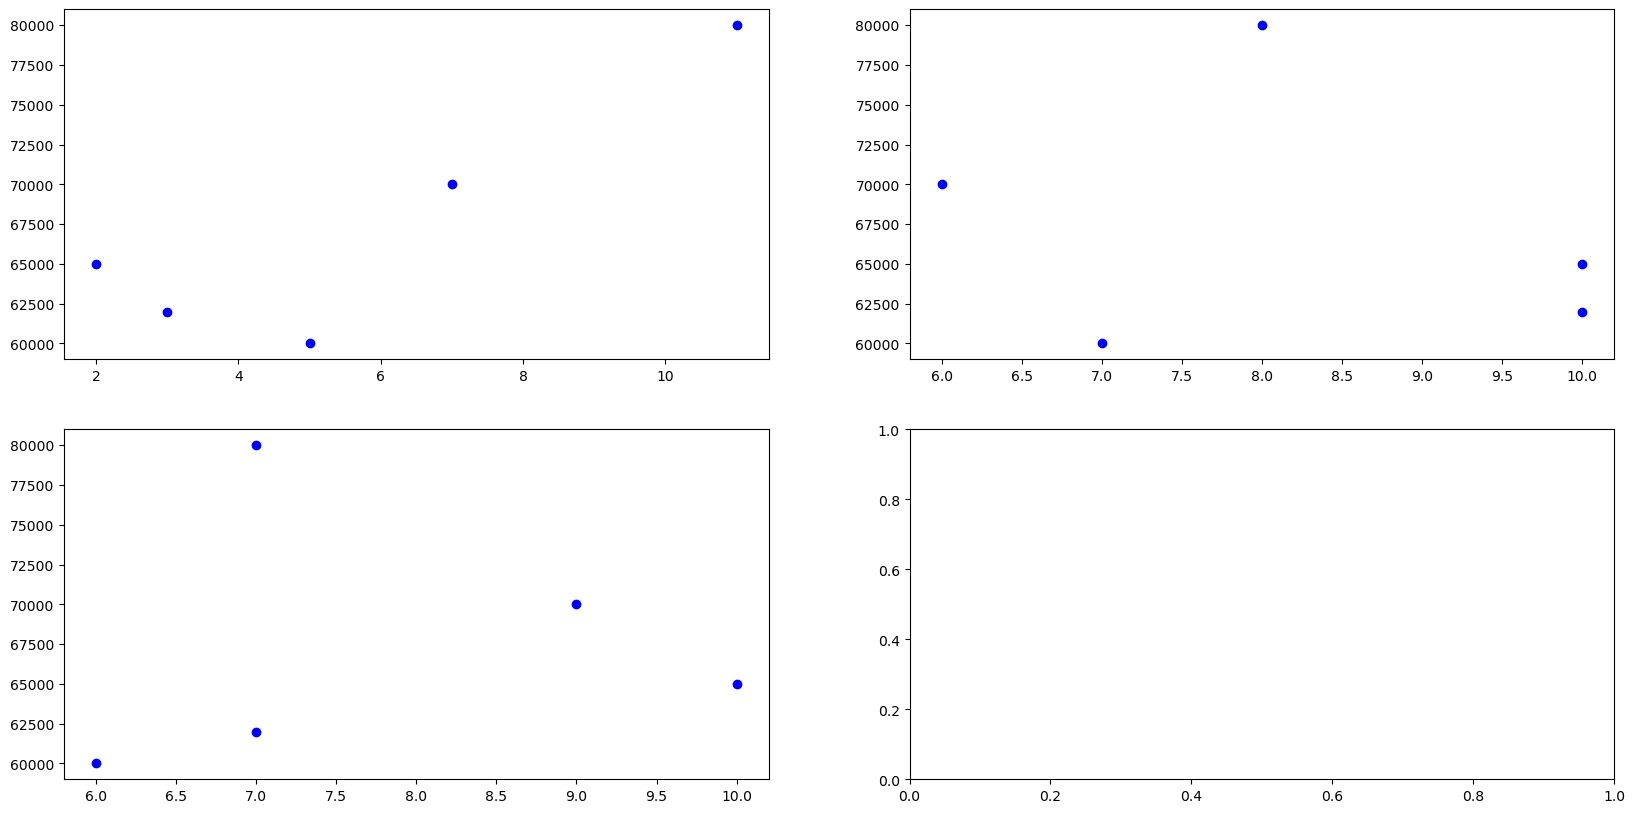

In [26]:
fig, ax = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax[0, 0].scatter(df.exp, df.sal,  color='blue') #row=0, col=0
ax[1, 0].scatter(df.tscore, df.sal,  color='blue') #row=1, col=0
ax[0, 1].scatter(df.iscore, df.sal,  color='blue')#row=0, col=1
plt.show()

### Train and Test

In [27]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:3].values #exclude salary
Y = df['sal'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=80)
# print(X_train ,Y_test)
print ('\n Train set:\n', X_train,  Y_train)
print ('\nTest set:', X_test,  Y_test)




 Train set:
 [[ 3.  7. 10.]
 [ 7.  9.  6.]
 [11.  7.  8.]] [62000 70000 80000]

Test set: [[ 2. 10. 10.]
 [ 5.  6.  7.]] [65000 60000]


### Multiple linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train,Y_train)
y_hat = reg.predict(X_test)

# from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , Y_test) )
# print(y_hat,Y_test)
print(reg.predict(np.array([[2,9,6]]))
,reg.predict(np.array([[12,10,10]])))




R2-score: -1.57
[58679.24528302] [81132.0754717]
